In [1]:
# Step 2. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
import string

In [2]:
# Step 3. Loading the headlines CSV
df_headlines = pd.read_csv('20th_century_headlines.csv')

In [3]:
print(df_headlines.head())


                           Section_Title
0                               Contents
1    Historic events in the 20th century
2  World at the beginning of the century
3                            Spanish flu
4                       Between the wars


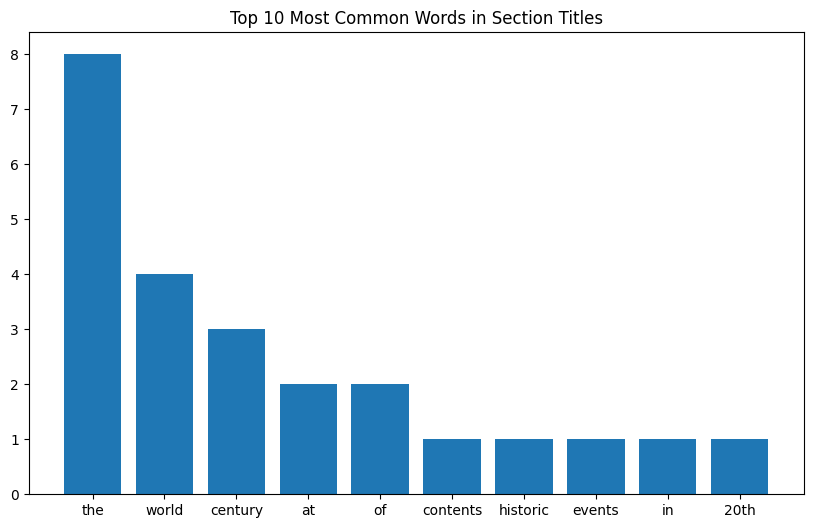

In [4]:
# Step 4. Tokenizzing words from the text and creating a bar chart to plot the 10 most common words.
# Combine all titles into a single string
text = " ".join(df_headlines['Section_Title'].astype(str))

# Tokenize
words = text.lower().split()

# Count words
from collections import Counter
word_counts = Counter(words)

# Top 10 most common words
top_words = word_counts.most_common(10)
words_top, counts_top = zip(*top_words)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(words_top, counts_top)
plt.title('Top 10 Most Common Words in Section Titles')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


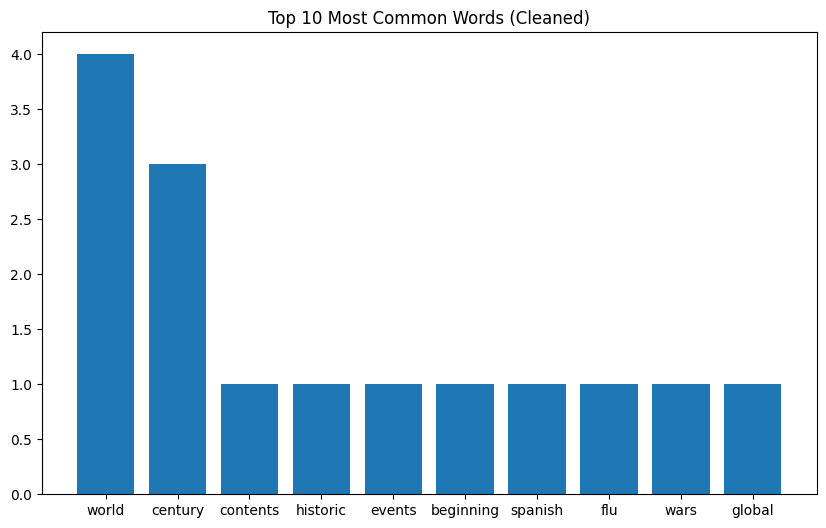

In [5]:
# Step 5. Removing stop words  and punctuation marks and re running the plot
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
words_clean = [w.strip(string.punctuation) for w in words if w not in stop_words and w.isalpha()]

word_counts_clean = Counter(words_clean)
top_words_clean = word_counts_clean.most_common(10)
words_c, counts_c = zip(*top_words_clean)

plt.figure(figsize=(10,6))
plt.bar(words_c, counts_c)
plt.title('Top 10 Most Common Words (Cleaned)')
plt.show()

In [6]:
# After removing stopwords and punctuation, the frequent words now reflect meaningful content like "world",
# "century", "flu", etc., rather than filler words like “the” or “in”.

In [ ]:
#Step 6. Creating a tags list using TextBlob 
import nltk
import os

# Ensure NLTK downloads to the environment's NLTK folder
nltk.data.path.append(os.path.join(os.environ['HOME'], 'nltk_data'))

# Download required corpora
nltk.download('punkt', download_dir=os.path.join(os.environ['HOME'], 'nltk_data'))
nltk.download('averaged_perceptron_tagger', download_dir=os.path.join(os.environ['HOME'], 'nltk_data'))
nltk.download('brown', download_dir=os.path.join(os.environ['HOME'], 'nltk_data'))
nltk.download('wordnet', download_dir=os.path.join(os.environ['HOME'], 'nltk_data'))
nltk.download('stopwords', download_dir=os.path.join(os.environ['HOME'], 'nltk_data'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from textblob import TextBlob

text = "The 20th century was full of historic events."
blob = TextBlob(text)
print(blob.tags)  # should work now without LookupError

MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
# Step 6 : fixing error
## TextBlob relies on NLTK corpora like punkt (for sentence splitting), averaged_perceptron_tagger (for POS tagging), 
# and wordnet. If those corpora aren’t installed, TextBlob raises a LookupError.

from textblob import download_corpora
download_corpora.download_all()

#This downloads all the necessary NLTK data for TextBlob into the correct environment. 
# After that, calling TextBlob(text).tags works without errors.

[nltk_data] Downloading package brown to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [ ]:
#Step6. Second try after fixing error

from textblob import TextBlob

text = "The 20th century was full of historic events."
blob = TextBlob(text)
print(blob.tags)  # should work without LookupError now

[('The', 'DT'), ('20th', 'JJ'), ('century', 'NN'), ('was', 'VBD'), ('full', 'JJ'), ('of', 'IN'), ('historic', 'JJ'), ('events', 'NNS')]


In [30]:
# Step 6: Create TextBlob object and extract POS tags
from textblob import TextBlob
import nltk

# Make sure necessary corpora are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('stopwords')

# Assuming 'text' is your article as a single string
blob = TextBlob(text)
pos_tags = blob.tags  # This creates the POS tags list

# Check the first 10 tags
print(pos_tags[:10])

[('The', 'DT'), ('20th', 'JJ'), ('century', 'NN'), ('was', 'VBD'), ('full', 'JJ'), ('of', 'IN'), ('historic', 'JJ'), ('events', 'NNS')]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/javieraquezada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Step 7. Creating a List of Top 10 POS tags for words that appear in the article
from collections import Counter

# Step 6: we already have pos_tags from TextBlob
# pos_tags = blob.tags

# Separate nouns, verbs, adjectives
nouns = Counter(word for word, tag in pos_tags if tag.startswith('NN'))
verbs = Counter(word for word, tag in pos_tags if tag.startswith('VB'))
adjectives = Counter(word for word, tag in pos_tags if tag.startswith('JJ'))

# Get top 10 of each
top_nouns = nouns.most_common(10)
top_verbs = verbs.most_common(10)
top_adjectives = adjectives.most_common(10)

print("Top 10 nouns:", top_nouns)
print("Top 10 verbs:", top_verbs)
print("Top 10 adjectives:", top_adjectives)

Top 10 nouns: [('century', 1), ('events', 1)]
Top 10 verbs: [('was', 1)]
Top 10 adjectives: [('20th', 1), ('full', 1), ('historic', 1)]


In [15]:
#You can analyze which nouns, verbs, and adjectives appear most and what this tells you about the focus of the text.

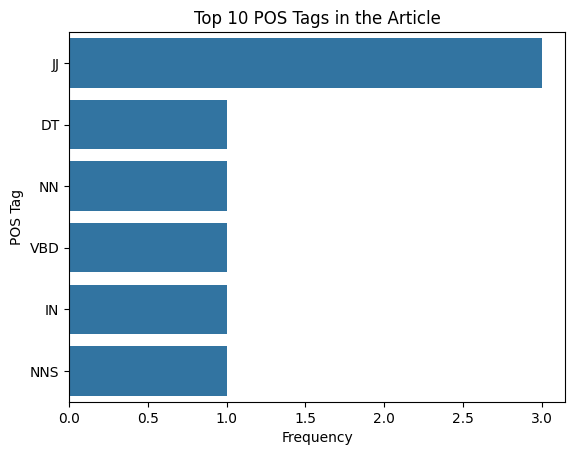

In [34]:
# Step 8. Ploting this list in a bar chart using seaborn library
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Count POS tags overall
pos_counts = Counter(tag for word, tag in pos_tags)

# Get top 10 POS tags
top10_pos = pos_counts.most_common(10)

# Prepare for plotting
tags, counts = zip(*top10_pos)

# Plot
sns.barplot(x=list(counts), y=list(tags))
plt.title("Top 10 POS Tags in the Article")
plt.xlabel("Frequency")
plt.ylabel("POS Tag")
plt.show()

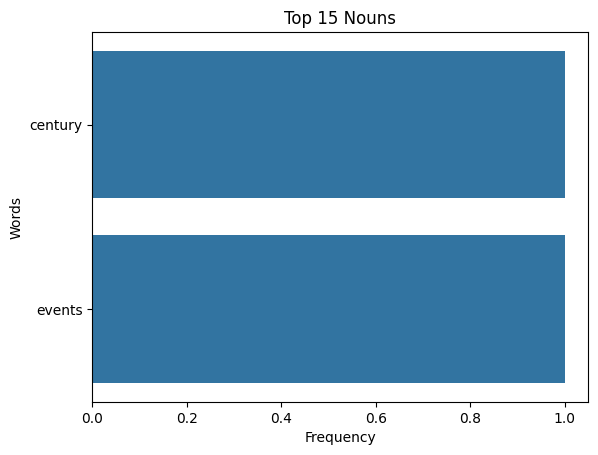

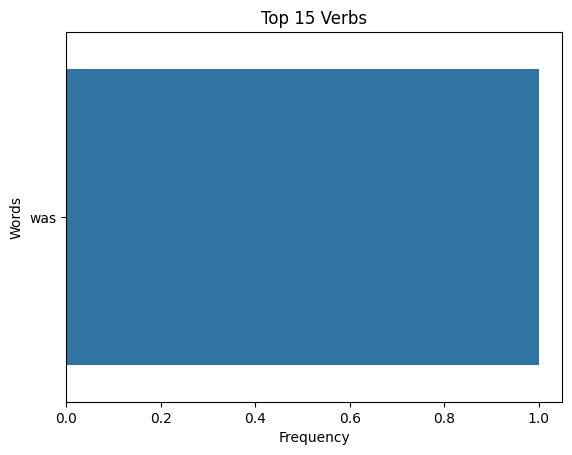

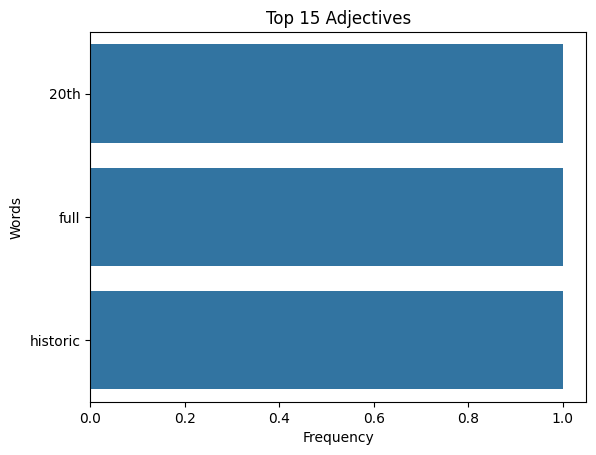

In [35]:
# Step 9: Separate POS tags by type
nouns = Counter(word for word, tag in pos_tags if tag.startswith('NN'))
verbs = Counter(word for word, tag in pos_tags if tag.startswith('VB'))
adjectives = Counter(word for word, tag in pos_tags if tag.startswith('JJ'))

# Function to plot top 15 words for a POS category
def plot_top_pos(counter, title):
    top15 = counter.most_common(15)
    words, counts = zip(*top15)
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Plot top 15 nouns
plot_top_pos(nouns, "Top 15 Nouns")

# Plot top 15 verbs
plot_top_pos(verbs, "Top 15 Verbs")

# Plot top 15 adjectives
plot_top_pos(adjectives, "Top 15 Adjectives")

In [10]:
import pandas as pd

# Skip the first row (duplicate header) and set the correct column names
df_countries_lookup = pd.read_csv(
    "countries_list_20th_century_1.5.csv",
    sep=";",
    skiprows=1,  # Skip the first row that contains 'country_name' again
    names=["id", "country_name"]
)

# Strip any leading/trailing whitespace in country names
df_countries_lookup["country_name"] = df_countries_lookup["country_name"].str.strip()

# Preview
print(df_countries_lookup.head())

    id  country_name
0  NaN  country_name
1  1.0   Afghanistan
2  2.0       Albania
3  3.0       Algeria
4  4.0       Andorra


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot country mentions
plt.figure(figsize=(10,6))
sns.barplot(data=df_countries, x="Country", y="Mentions", palette="viridis")

plt.title("Frequency of Country Mentions in 20th Century Text", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Number of Mentions")
plt.xlabel("Country")
plt.show()

NameError: name 'df_countries' is not defined

<Figure size 1000x600 with 0 Axes>